In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


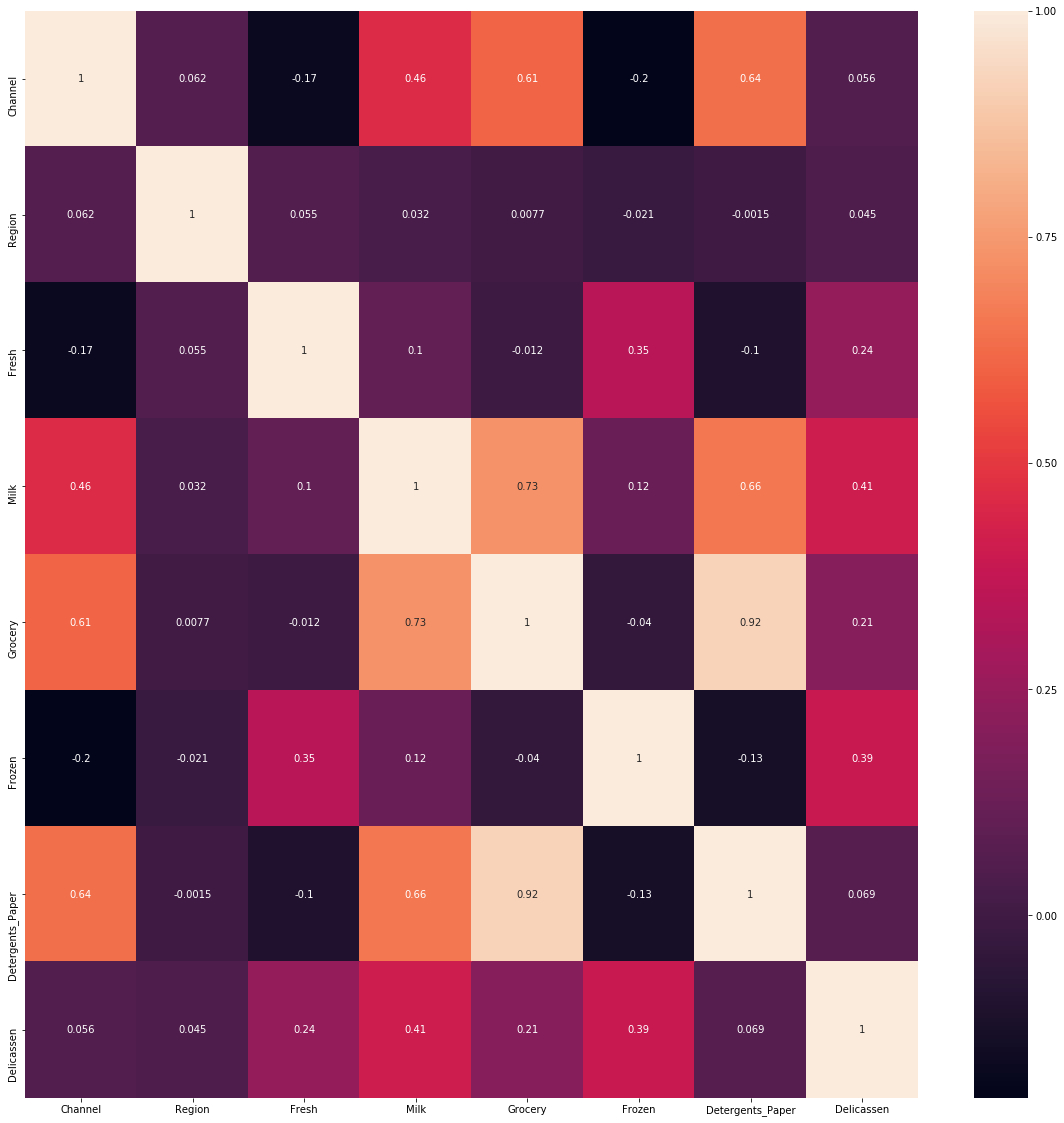

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

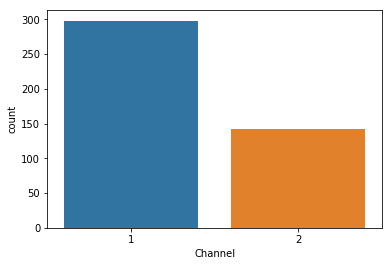

In [7]:
sns.countplot(df['Channel'])

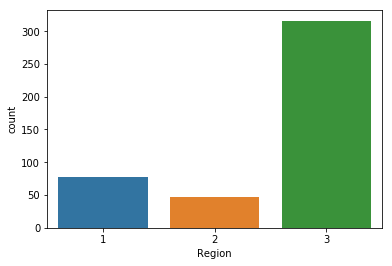

In [8]:
sns.countplot(df['Region'])

In [9]:
df.drop(['Region'],axis=1,inplace=True)
df.drop(['Channel'],axis=1,inplace=True)

In [10]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [11]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


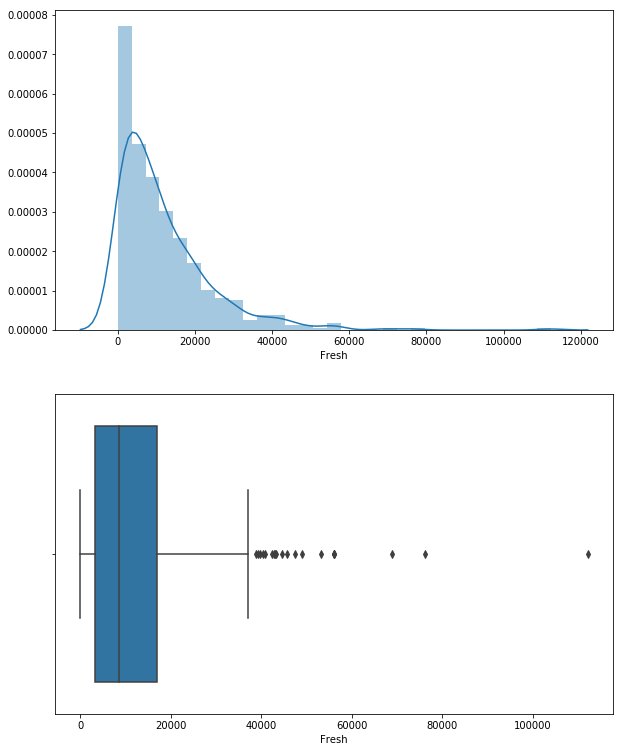

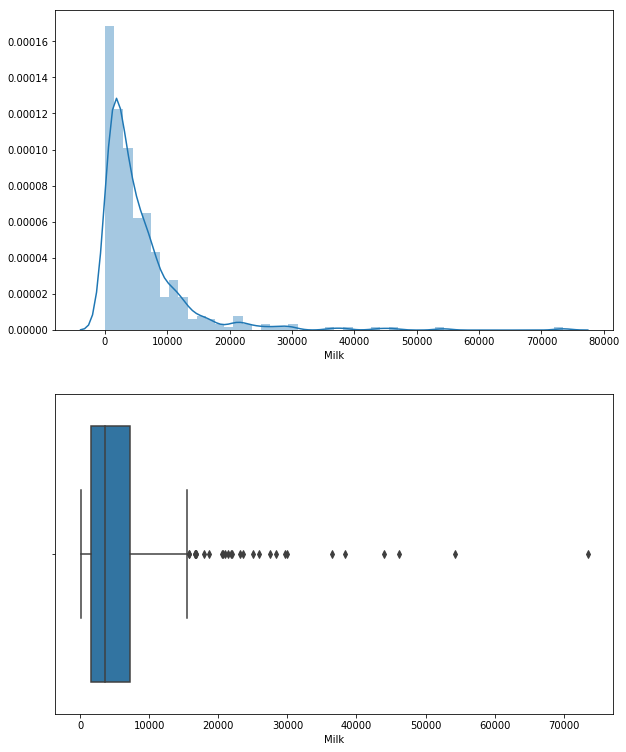

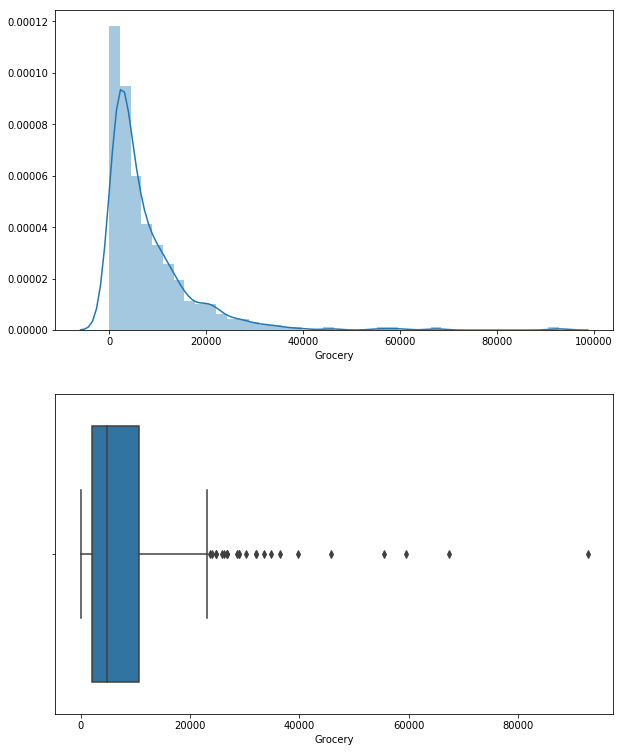

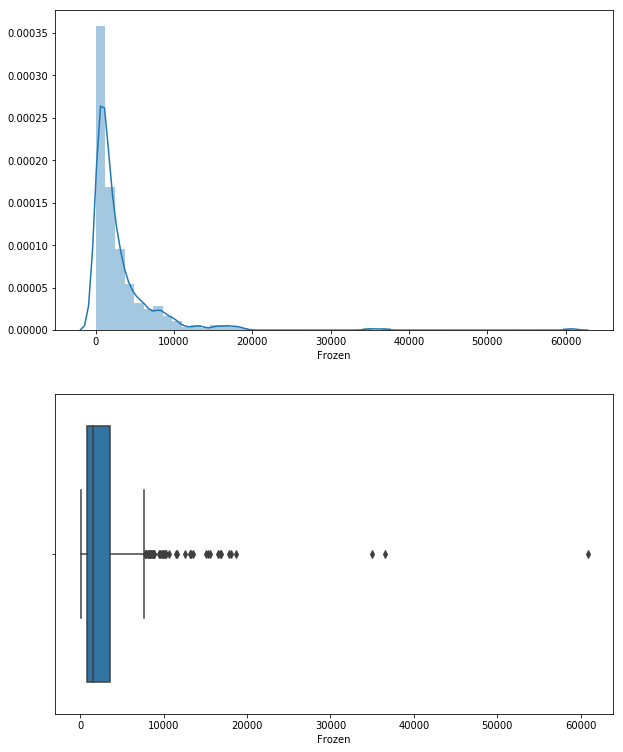

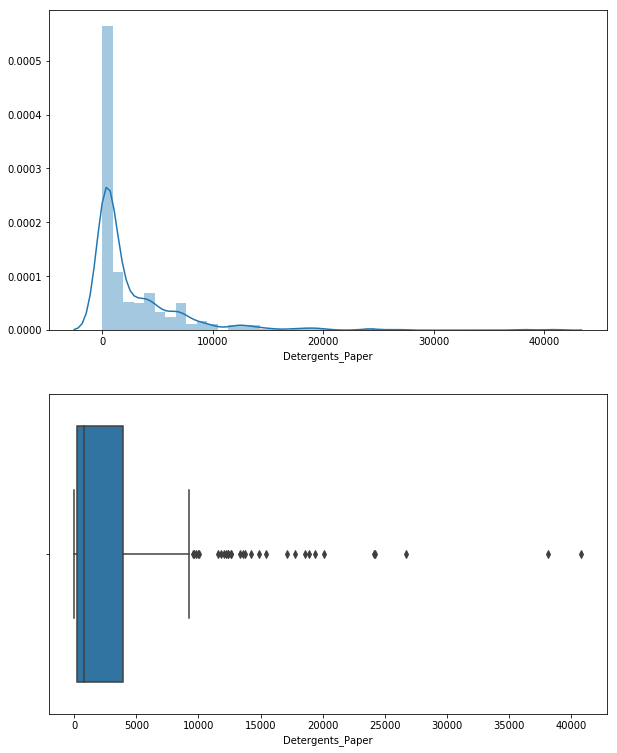

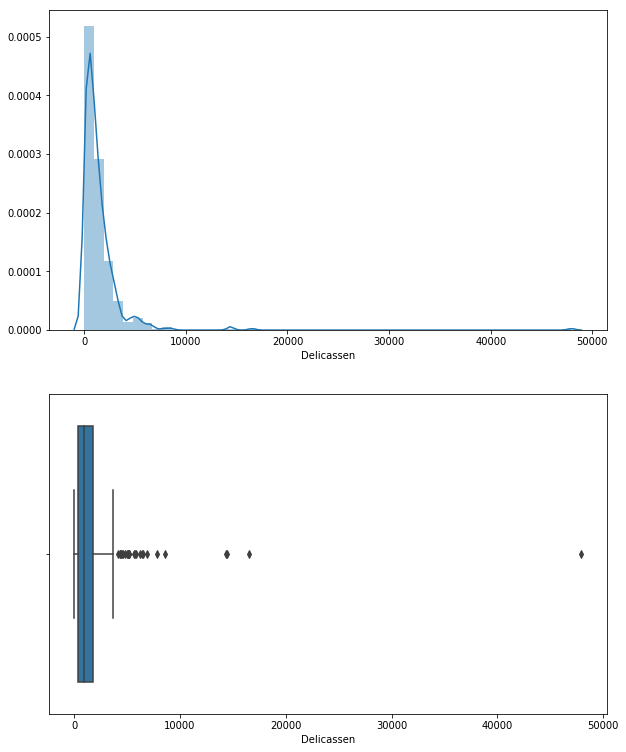

In [12]:
for i in df:
    plt.figure(figsize=(10,20))
    plt.subplot(311)
    sns.distplot(df[i])
    plt.subplot(312)
    sns.boxplot(df[i])

K-Means Clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [14]:
ss=StandardScaler()
df_K=ss.fit_transform(df)

In [15]:
Kmeans=KMeans(n_clusters=2,n_jobs=-1)
Kmeans.fit(df_K)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
pred=Kmeans.predict(df_K)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
pd.Series(pred).value_counts()

0    387
1     53
dtype: int64

In [18]:
Kmeans.inertia_

1954.802027461528

In [19]:
Kmeans.score(df_K)

-1954.8020274615278

In [20]:
EcuclideanDistance=[]
sse=[]
for cluster in range(2,11):
    Kmeans=KMeans(n_clusters=cluster,n_jobs=-1)
    Kmeans.fit(df_K)
    pred=Kmeans.predict(df_K)
    sse.append(Kmeans.inertia_)
    score=silhouette_score(df_K, pred, metric='euclidean')
    EcuclideanDistance.append(score)

In [21]:
C_frame=pd.DataFrame({'cluster':range(2,11),'SSE':sse,'EcuclideanDistance':EcuclideanDistance})
C_frame

,cluster,SSE,EcuclideanDistance
0,2,1954.504814,0.580971
1,3,1608.431149,0.548287
2,4,1325.979474,0.404065
3,5,1058.771253,0.369040
4,6,917.658141,0.372778
5,7,838.576150,0.353989
6,8,744.305040,0.328392
7,9,662.284713,0.313895
8,10,599.917283,0.311036


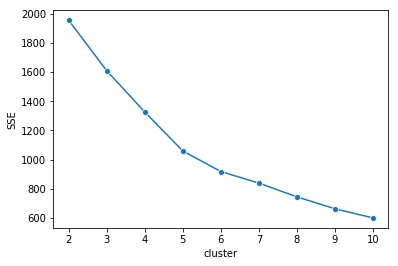

In [22]:
sns.lineplot(x=C_frame['cluster'],y=C_frame['SSE'],marker='o')

In [23]:
C_frame['EcuclideanDistance'].mean()

0.3980504280300604

In [24]:
Kmeans=KMeans(n_clusters=2,n_jobs=-1)
Kmeans.fit(df_K)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
pred=Kmeans.predict(df_K)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
pd.Series(pred).value_counts()

0    404
1     36
dtype: int64

In [27]:
score = silhouette_score(df_K, pred, metric='euclidean')
score

0.6136936741219485

In [28]:
df_K=pd.DataFrame(df_K)

In [29]:
df_K['Cluster']=pred

In [30]:
df_K.head()

,0,1,2,3,4,5,Cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [31]:
df_K.groupby(['Cluster']).mean()

,0,1,2,3,4,5
Cluster,,,,,,
0,-0.010975,-0.194932,-0.212641,-0.034855,-0.217697,-0.082801
1,0.123162,2.187566,2.386300,0.391153,2.443045,0.929210


**Hierarchical Clustring**

In [35]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [36]:
ss=StandardScaler()
df_HC=ss.fit_transform(df)
df_HC= pd.DataFrame(df_HC, columns=df.columns)

In [37]:
Agg=AgglomerativeClustering()
cluster=Agg.fit(df_HC)

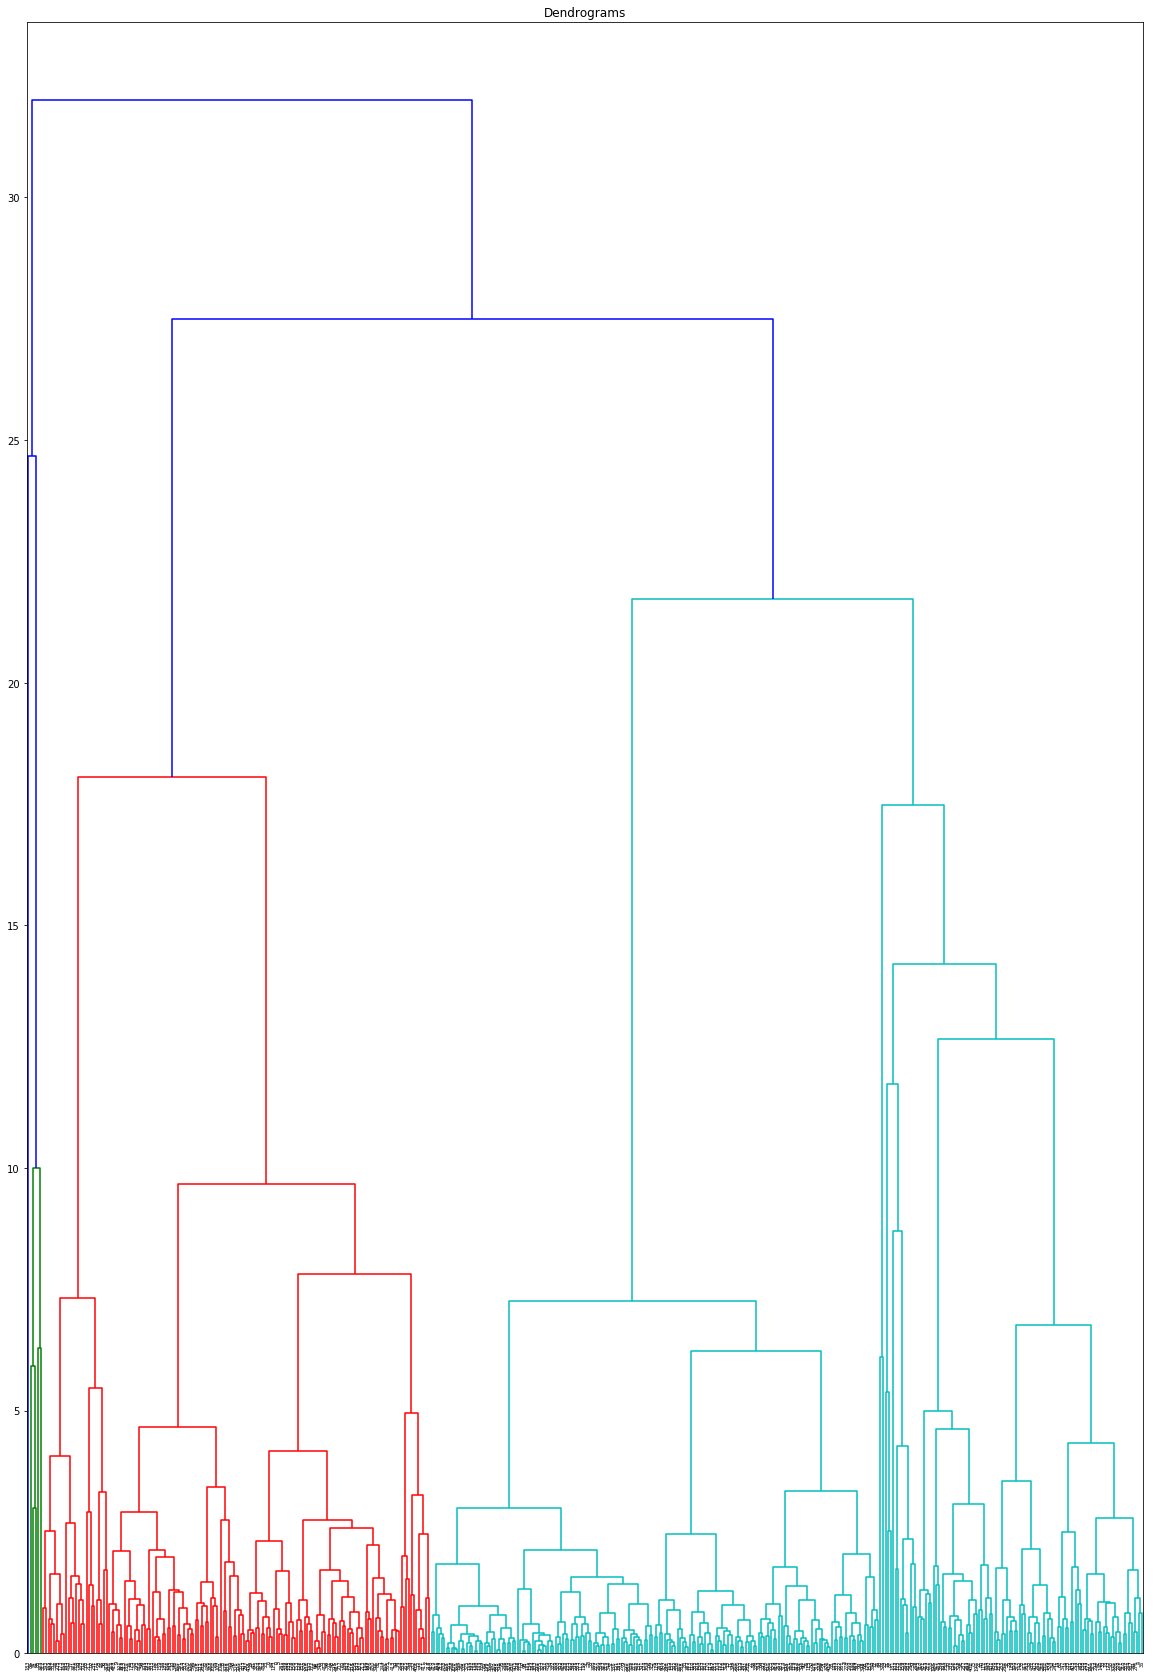

In [38]:
plt.figure(figsize=(20, 30))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_HC, method='ward'))

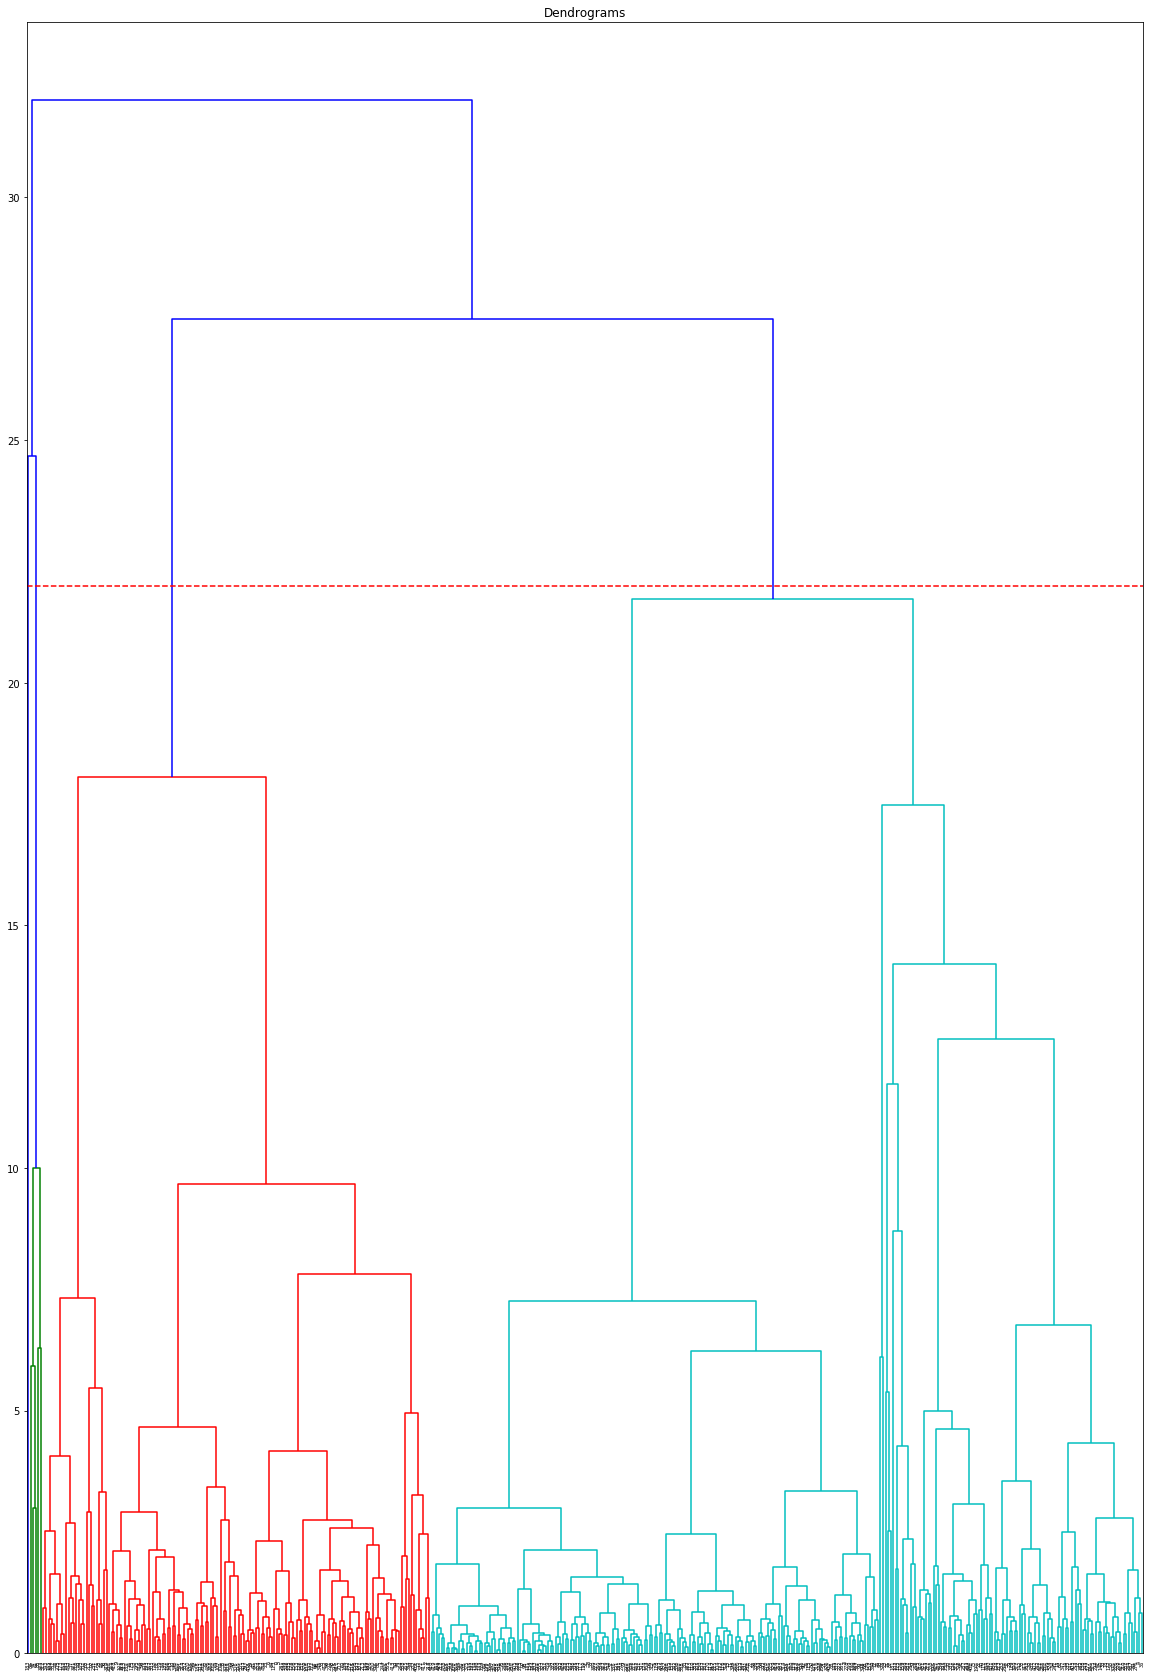

In [39]:
plt.figure(figsize=(20, 30))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_HC, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')

In [40]:
Agg=AgglomerativeClustering(n_clusters=3)
cluster=Agg.fit(df_HC)

In [41]:
pre=cluster.labels_

In [42]:
pd.Series(pre).value_counts()

1    281
2    153
0      6
dtype: int64

In [43]:
score = silhouette_score(df_HC, pre, metric='euclidean')
score

0.2646091480214908